<a href="https://colab.research.google.com/github/DaffaFathir/Machine-Learning-Task/blob/main/Tugas%2012/CNN_VGG_Daffa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Nama    : Daffa Fathir Fajri
# NIM     : 1103213149
# Kelas   : TK-45-04
# Lecture : 12
# Model   : CNN (VGG)
# Dataset : Fashion MNIST

chatGPT promph : https://chatgpt.com/share/19b146d0-c916-498c-96fa-844153d4128a

**Pertama, kita perlu mengimpor semua pustaka yang diperlukan.**

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive


**Hubungkan Google Drive agar kita bisa mengakses dataset.**

In [24]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Baca file train.csv dan test.csv dari Google Drive.**

In [25]:
# Path to your dataset files
train_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_train.csv'
test_path = '/content/drive/MyDrive/Machine Learning/Fashion/fashion-mnist_test.csv'

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

**Pisahkan fitur dan label, normalisasi data, dan ubah label menjadi one-hot encoding.**

In [26]:
# Split features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Definisikan arsitektur model VGG.**

In [27]:
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Block
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Flattening
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                

**Mengatur parameter untuk training.**

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Melatih model dengan data yang sudah disiapkan.**

In [29]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 19s 18ms/step - loss: 0.5881 - accuracy: 0.7849 - val_loss: 0.3316 - val_accuracy: 0.8811
Epoch 2/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3201 - accuracy: 0.8865 - val_loss: 0.3151 - val_accuracy: 0.8900
Epoch 3/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2727 - accuracy: 0.9017 - val_loss: 0.2933 - val_accuracy: 0.9025
Epoch 4/20
750/750 [==============================] - 12s 16ms/step - loss: 0.2420 - accuracy: 0.9140 - val_loss: 0.2586 - val_accuracy: 0.9107
Epoch 5/20
750/750 [==============================] - 13s 17ms/step - loss: 0.2155 - accuracy: 0.9222 - val_loss: 0.2348 - val_accuracy: 0.9203
Epoch 6/20
750/750 [==============================] - 12s 16ms/step - loss: 0.1956 - accuracy: 0.9312 - val_loss: 0.2269 - val_accuracy: 0.9220
Epoch 7/20
750/750 [==============================] - 12s 16ms/step - loss: 0.1788 - accuracy: 0.9368 - val_loss: 0.2337 - val_accuracy:

**Mengevaluasi model dengan data uji.**

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


313/313 [==============================] - 2s 7ms/step - loss: 0.3511 - accuracy: 0.9238
Test Loss: 0.35105547308921814
Test Accuracy: 0.923799991607666


**Visualisasi kinerja model selama training.**

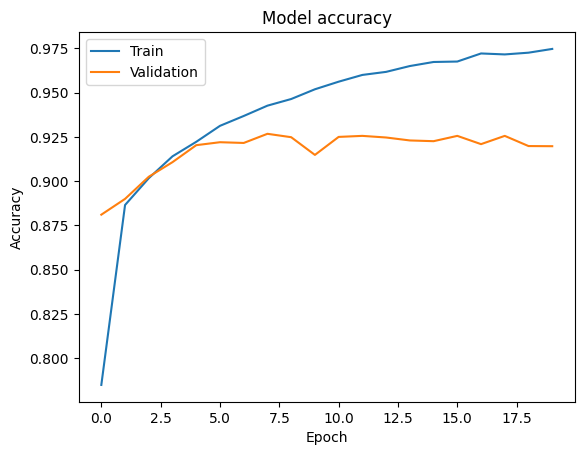

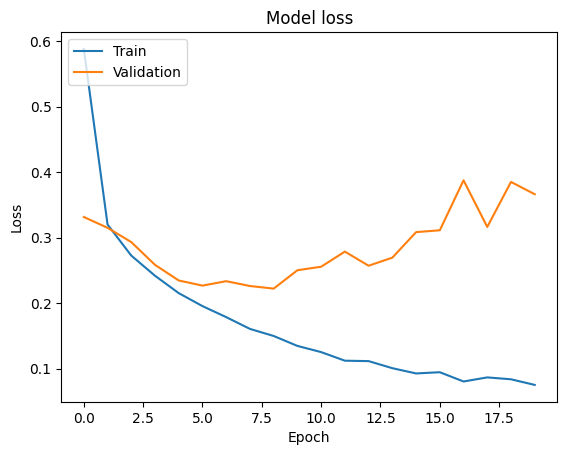

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
